In [1]:
# ==============================================
# COMMON IMPORTS (Run this cell first)
# ==============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import seaborn as sns
import os
import zipfile
import requests
import io

# Set random seeds for reproducibility (optional)
np.random.seed(42)
tf.random.set_seed(42)

print("TensorFlow Version:", tf.__version__)
print("Keras Version:", keras.__version__)

/Users/aditya/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


TensorFlow Version: 2.19.0
Keras Version: 3.9.2



--- Assignment 9: Autoencoders ---
Loading MNIST data for Autoencoder...
x_train_ae_flat shape: (60000, 784)
x_test_ae_flat shape: (10000, 784)

--- Basic Autoencoder ---


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 32)             │       104,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 784)            │       105,360 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209,968 (820.19 KB)

 Trainable params: 209,968 (820.19 KB)

 Non-trainable params: 0 (0.00 B)

Training basic autoencoder...
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 0.3335 - val_loss: 0.1542
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1447 - val_loss: 0.1211
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.1193 - val_loss: 0.1095
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.1096 - val_loss: 0.1039
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.1044 - val_loss: 0.0999
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.1005 - val_loss: 0.0970
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0979 - val_loss: 0.0951
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0960 - val_loss: 0.0936
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0945 - val_loss: 0.0925
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0935 - val_loss: 0.0917
Visualizing basic autoencoder reconstructions...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step 


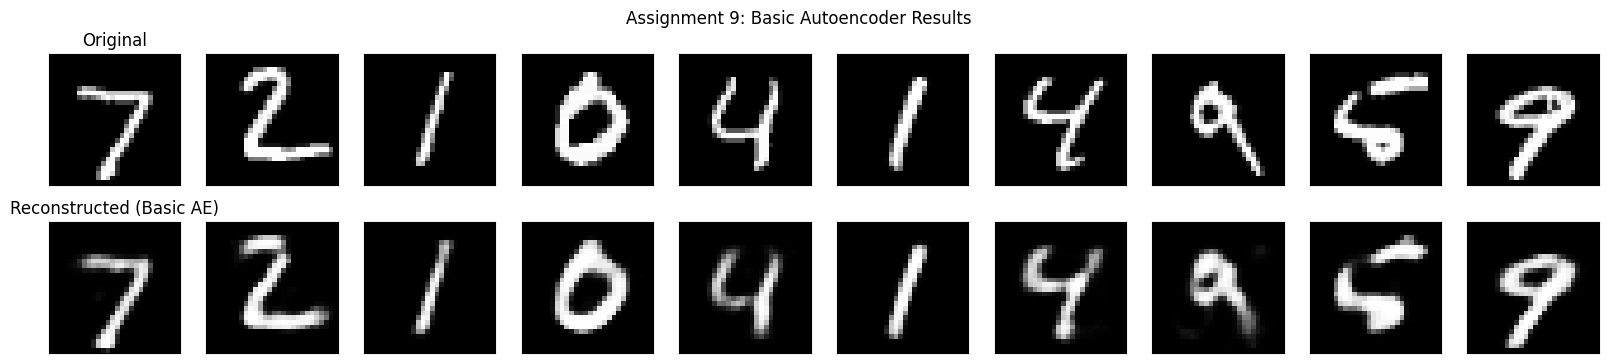


--- Denoising Autoencoder ---
Training denoising autoencoder...
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.3304 - val_loss: 0.1798
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.1726 - val_loss: 0.1513
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.1496 - val_loss: 0.1404
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1404 - val_loss: 0.1349
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.1352 - val_loss: 0.1306
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.1311 - val_loss: 0.1271
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1279 - val_loss: 0.1245
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1253 - val_loss: 0.1225
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.1232 - val_loss: 0.1211
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.1216 - val_loss: 0.1200
Visualizing denoising autoencoder results...
313/313 ━━━━━━━━━

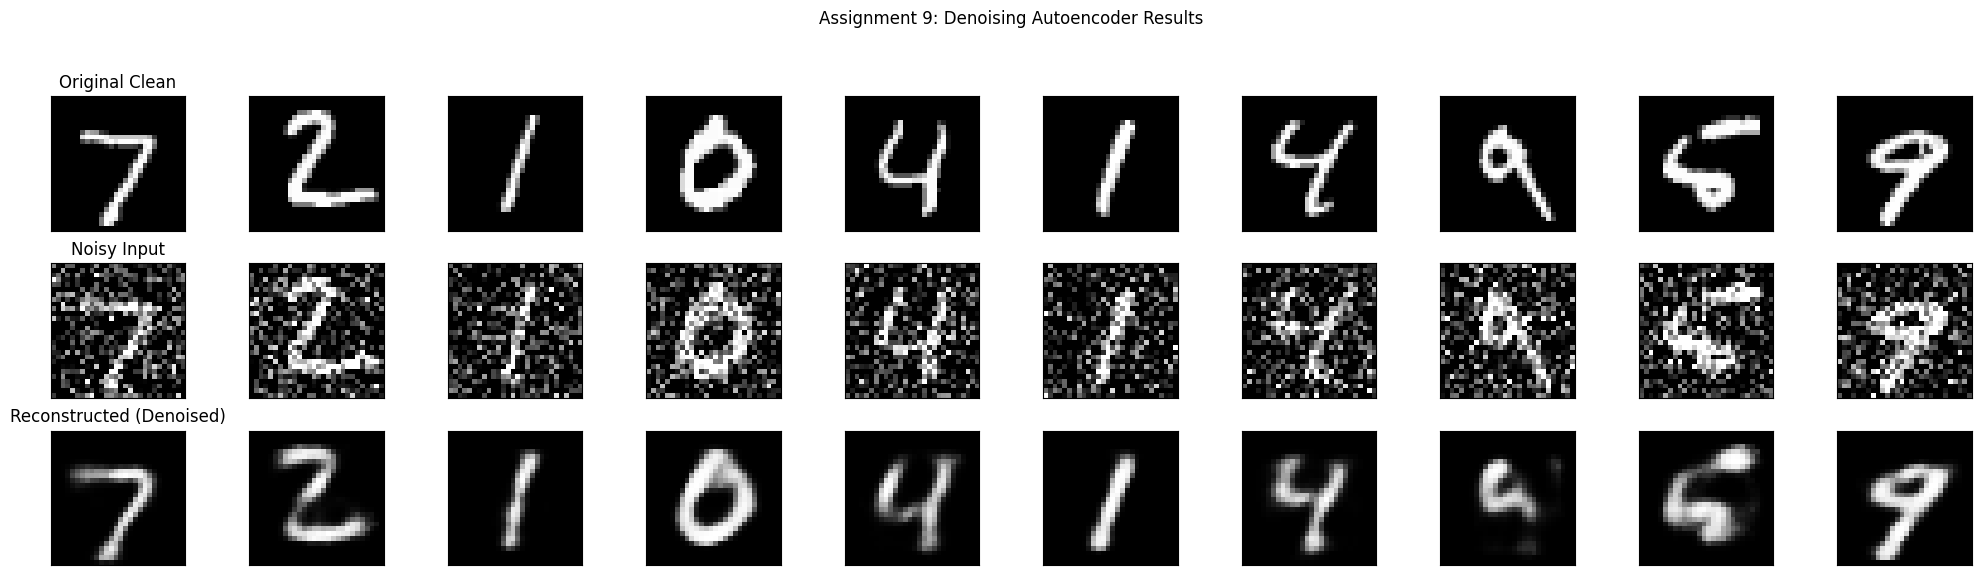

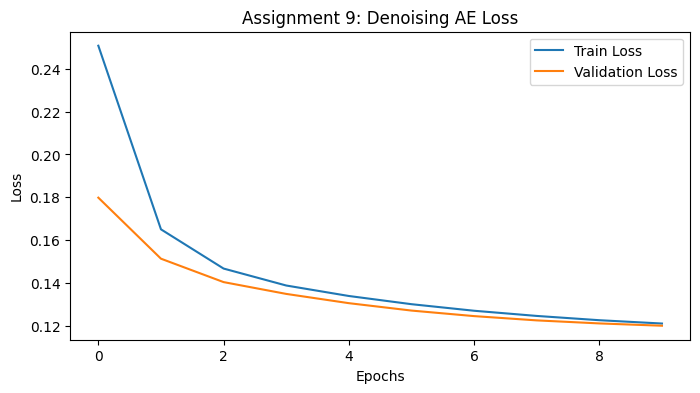


Visualizing Latent Space (Dimensionality Reduction)...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Encoded image shape (latent space): (10000, 32)
Running t-SNE... (can take a minute)


/Users/aditya/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [ ]:
# ==============================================
# Assignment 9: Autoencoders (Basic, Denoising on MNIST)
# ==============================================
print("\n--- Assignment 9: Autoencoders ---")

# --- 1. Load and Preprocess MNIST Data ---
print("Loading MNIST data for Autoencoder...")
(x_train_ae, _), (x_test_ae, y_test_ae) = keras.datasets.mnist.load_data() # Labels not needed for basic AE

# Normalize and flatten for basic AE
x_train_ae_flat = x_train_ae.astype('float32') / 255.
x_test_ae_flat = x_test_ae.astype('float32') / 255.
x_train_ae_flat = x_train_ae_flat.reshape((len(x_train_ae_flat), np.prod(x_train_ae_flat.shape[1:])))
x_test_ae_flat = x_test_ae_flat.reshape((len(x_test_ae_flat), np.prod(x_test_ae_flat.shape[1:])))

print(f"x_train_ae_flat shape: {x_train_ae_flat.shape}")
print(f"x_test_ae_flat shape: {x_test_ae_flat.shape}")

# --- 2. Basic Autoencoder (Data Compression / Dimensionality Reduction) ---
print("\n--- Basic Autoencoder ---")
latent_dim = 32  # Size of the compressed representation (bottleneck)

# Encoder
encoder_inputs = keras.Input(shape=(784,))
x = layers.Dense(128, activation='relu')(encoder_inputs)
encoder_outputs = layers.Dense(latent_dim, activation='relu')(x) # Bottleneck
encoder = keras.Model(encoder_inputs, encoder_outputs, name="encoder")

# Decoder
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(128, activation='relu')(latent_inputs)
decoder_outputs = layers.Dense(784, activation='sigmoid')(x) # Sigmoid for pixel values [0,1]
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")

# Autoencoder (Encoder + Decoder)
autoencoder_inputs = keras.Input(shape=(784,))
encoded = encoder(autoencoder_inputs)
decoded = decoder(encoded)
autoencoder = keras.Model(autoencoder_inputs, decoded, name="autoencoder")

autoencoder.summary()

# Compile Autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') # Or 'mse'

# Train Autoencoder
print("Training basic autoencoder...")
epochs_ae = 10 # Reduced for quick demo
batch_size_ae = 256
history_ae = autoencoder.fit(x_train_ae_flat, x_train_ae_flat, # Input is also the target
                             epochs=epochs_ae,
                             batch_size=batch_size_ae,
                             shuffle=True,
                             validation_data=(x_test_ae_flat, x_test_ae_flat))

# Evaluate / Visualize Reconstruction
print("Visualizing basic autoencoder reconstructions...")
decoded_imgs_basic = autoencoder.predict(x_test_ae_flat)

n = 10  # How many digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_ae_flat[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0: ax.set_title("Original")

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_basic[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0: ax.set_title("Reconstructed (Basic AE)")
plt.suptitle("Assignment 9: Basic Autoencoder Results")
plt.show()

# --- 3. Denoising Autoencoder ---
print("\n--- Denoising Autoencoder ---")
# Prepare data (reshape for CNN AE if desired, or keep flat)
x_train_ae_denoise = x_train_ae.astype('float32') / 255.
x_test_ae_denoise = x_test_ae.astype('float32') / 255.
# Keep images 2D for this example (can use CNN AE too)
# x_train_ae_denoise = np.reshape(x_train_ae_denoise, (len(x_train_ae_denoise), 28, 28, 1))
# x_test_ae_denoise = np.reshape(x_test_ae_denoise, (len(x_test_ae_denoise), 28, 28, 1))

# Add noise
noise_factor = 0.4 # Increase for more noise
x_train_noisy = x_train_ae_denoise + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_ae_denoise.shape)
x_test_noisy = x_test_ae_denoise + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_ae_denoise.shape)

# Clip values to be between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Flatten noisy data for the basic AE architecture (or adapt AE to CNN)
x_train_noisy_flat = x_train_noisy.reshape((len(x_train_noisy), np.prod(x_train_noisy.shape[1:])))
x_test_noisy_flat = x_test_noisy.reshape((len(x_test_noisy), np.prod(x_test_noisy.shape[1:])))


# Re-use the same basic autoencoder structure (or define a new CNN AE)
# Define a new instance or re-compile the existing one if needed
# Here, we train the *same* AE architecture but with noisy input and clean target
autoencoder_denoise = keras.models.clone_model(autoencoder) # Create a fresh copy
autoencoder_denoise.compile(optimizer='adam', loss='binary_crossentropy')

# Train Denoising Autoencoder
print("Training denoising autoencoder...")
history_denoise_ae = autoencoder_denoise.fit(x_train_noisy_flat, x_train_ae_flat, # Noisy input, clean target
                                             epochs=epochs_ae, # Use more epochs (e.g., 20-30)
                                             batch_size=batch_size_ae,
                                             shuffle=True,
                                             validation_data=(x_test_noisy_flat, x_test_ae_flat))

# Evaluate / Visualize Denoising
print("Visualizing denoising autoencoder results...")
decoded_imgs_denoise = autoencoder_denoise.predict(x_test_noisy_flat)

n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original (clean)
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_ae_flat[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0: ax.set_title("Original Clean")

    # Display noisy input
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy_flat[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0: ax.set_title("Noisy Input")

    # Display reconstruction (denoised)
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs_denoise[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0: ax.set_title("Reconstructed (Denoised)")
plt.suptitle("Assignment 9: Denoising Autoencoder Results")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plot loss history for denoising AE
plt.figure(figsize=(8, 4))
plt.plot(history_denoise_ae.history['loss'], label='Train Loss')
plt.plot(history_denoise_ae.history['val_loss'], label='Validation Loss')
plt.title('Assignment 9: Denoising AE Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# --- Latent Space Visualization (using basic AE's encoder) ---
print("\nVisualizing Latent Space (Dimensionality Reduction)...")
# Encode the test set using the trained encoder
encoded_imgs = encoder.predict(x_test_ae_flat)
print(f"Encoded image shape (latent space): {encoded_imgs.shape}") # Should be (10000, latent_dim)

# Use t-SNE for visualization (optional, requires scikit-learn)
try:
    from sklearn.manifold import TSNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300) # Adjust params as needed
    print("Running t-SNE... (can take a minute)")
    tsne_results = tsne.fit_transform(encoded_imgs) # Use encoded representation

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=y_test_ae, cmap=plt.cm.get_cmap("jet", 10), s=10)
    plt.colorbar(scatter, ticks=range(10))
    plt.title('Assignment 9: t-SNE visualization of MNIST latent space')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.clim(-0.5, 9.5)
    plt.show()

except ImportError:
    print("Scikit-learn not found. Skipping t-SNE visualization.")
except Exception as e:
     print(f"An error occurred during t-SNE: {e}")